In [113]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# reading the data from the file
with open('/home/aynur/Downloads/r0r60r120_2020-2020__0-2495__HeadTilt_Topcon_Data') as f:
    data = f.read()

In [114]:
data

"{'N3': {'right': {'results': {'r0': 0.9987820251299121, 'r60': 0.22040354826462646, 'r120': 0.28081442660546146}, 'info': {'ds': 0.0, 'dc': -1.0, 'ax': 88}}, 'left': {'results': {'r0': 0.0814022039099215, 'r60': -0.39314848284690096, 'r120': 0.6867462789369794}, 'info': {'ds': -0.25, 'dc': -1.25, 'ax': 43}}}, 'N5': {'right': {'results': {'r0': 0.698017520982994, 'r60': -1.4823653726797492, 'r120': -2.2156521483032448}, 'info': {'ds': -0.25, 'dc': -3.5, 'ax': 97}}, 'left': {'results': {'r0': 3.4969550628247803, 'r60': 1.7020360665136531, 'r120': 1.5510088706615666}, 'info': {'ds': 2.5, 'dc': -2.5, 'ax': 92}}}, 'N6': {'right': {'results': {'r0': 1.504865965629215, 'r60': 2.3078307376628295, 'r120': 2.187303296707956}, 'info': {'ds': 0.5, 'dc': 1.0, 'ax': 86}}, 'left': {'results': {'r0': 2.2132923872213652, 'r60': 0.9426413808919543, 'r120': 1.3440662318866805}, 'info': {'ds': 1.25, 'dc': -1.5, 'ax': 81}}}, 'N7': {'right': {'results': {'r0': 1.4925739315689992, 'r60': 1.1810906610457501,

In [115]:
print(type(data))

<class 'str'>


In [116]:
import ast
convertedDict = ast.literal_eval(data)
print("After conversion: ", convertedDict)
print(type(convertedDict))

After conversion:  {'N3': {'right': {'results': {'r0': 0.9987820251299121, 'r60': 0.22040354826462646, 'r120': 0.28081442660546146}, 'info': {'ds': 0.0, 'dc': -1.0, 'ax': 88}}, 'left': {'results': {'r0': 0.0814022039099215, 'r60': -0.39314848284690096, 'r120': 0.6867462789369794}, 'info': {'ds': -0.25, 'dc': -1.25, 'ax': 43}}}, 'N5': {'right': {'results': {'r0': 0.698017520982994, 'r60': -1.4823653726797492, 'r120': -2.2156521483032448}, 'info': {'ds': -0.25, 'dc': -3.5, 'ax': 97}}, 'left': {'results': {'r0': 3.4969550628247803, 'r60': 1.7020360665136531, 'r120': 1.5510088706615666}, 'info': {'ds': 2.5, 'dc': -2.5, 'ax': 92}}}, 'N6': {'right': {'results': {'r0': 1.504865965629215, 'r60': 2.3078307376628295, 'r120': 2.187303296707956}, 'info': {'ds': 0.5, 'dc': 1.0, 'ax': 86}}, 'left': {'results': {'r0': 2.2132923872213652, 'r60': 0.9426413808919543, 'r120': 1.3440662318866805}, 'info': {'ds': 1.25, 'dc': -1.5, 'ax': 81}}}, 'N7': {'right': {'results': {'r0': 1.4925739315689992, 'r60': 1

In [117]:
convertedDict

{'N3': {'right': {'results': {'r0': 0.9987820251299121,
    'r60': 0.22040354826462646,
    'r120': 0.28081442660546146},
   'info': {'ds': 0.0, 'dc': -1.0, 'ax': 88}},
  'left': {'results': {'r0': 0.0814022039099215,
    'r60': -0.39314848284690096,
    'r120': 0.6867462789369794},
   'info': {'ds': -0.25, 'dc': -1.25, 'ax': 43}}},
 'N5': {'right': {'results': {'r0': 0.698017520982994,
    'r60': -1.4823653726797492,
    'r120': -2.2156521483032448},
   'info': {'ds': -0.25, 'dc': -3.5, 'ax': 97}},
  'left': {'results': {'r0': 3.4969550628247803,
    'r60': 1.7020360665136531,
    'r120': 1.5510088706615666},
   'info': {'ds': 2.5, 'dc': -2.5, 'ax': 92}}},
 'N6': {'right': {'results': {'r0': 1.504865965629215,
    'r60': 2.3078307376628295,
    'r120': 2.187303296707956},
   'info': {'ds': 0.5, 'dc': 1.0, 'ax': 86}},
  'left': {'results': {'r0': 2.2132923872213652,
    'r60': 0.9426413808919543,
    'r120': 1.3440662318866805},
   'info': {'ds': 1.25, 'dc': -1.5, 'ax': 81}}},
 'N7': {

In [118]:
keys_list = list(convertedDict.keys())
id=keys_list
id=list(id)

In [119]:
values_list = list(convertedDict.values())

In [120]:
a_key = keys_list
a_val=values_list

In [121]:
print(len(a_key))

5788


In [122]:
print(a_val)

[{'right': {'results': {'r0': 0.9987820251299121, 'r60': 0.22040354826462646, 'r120': 0.28081442660546146}, 'info': {'ds': 0.0, 'dc': -1.0, 'ax': 88}}, 'left': {'results': {'r0': 0.0814022039099215, 'r60': -0.39314848284690096, 'r120': 0.6867462789369794}, 'info': {'ds': -0.25, 'dc': -1.25, 'ax': 43}}}, {'right': {'results': {'r0': 0.698017520982994, 'r60': -1.4823653726797492, 'r120': -2.2156521483032448}, 'info': {'ds': -0.25, 'dc': -3.5, 'ax': 97}}, 'left': {'results': {'r0': 3.4969550628247803, 'r60': 1.7020360665136531, 'r120': 1.5510088706615666}, 'info': {'ds': 2.5, 'dc': -2.5, 'ax': 92}}}, {'right': {'results': {'r0': 1.504865965629215, 'r60': 2.3078307376628295, 'r120': 2.187303296707956}, 'info': {'ds': 0.5, 'dc': 1.0, 'ax': 86}}, 'left': {'results': {'r0': 2.2132923872213652, 'r60': 0.9426413808919543, 'r120': 1.3440662318866805}, 'info': {'ds': 1.25, 'dc': -1.5, 'ax': 81}}}, {'right': {'results': {'r0': 1.4925739315689992, 'r60': 1.1810906610457501, 'r120': 1.07633540738525

In [123]:
a_value = values_list[0]

In [124]:
a_value

{'right': {'results': {'r0': 0.9987820251299121,
   'r60': 0.22040354826462646,
   'r120': 0.28081442660546146},
  'info': {'ds': 0.0, 'dc': -1.0, 'ax': 88}},
 'left': {'results': {'r0': 0.0814022039099215,
   'r60': -0.39314848284690096,
   'r120': 0.6867462789369794},
  'info': {'ds': -0.25, 'dc': -1.25, 'ax': 43}}}

In [125]:
keys_list1 = list(a_value.keys())
val_list1 = list(a_value.values())

In [126]:
keys_list1

['right', 'left']

In [127]:
b_value =val_list1[0]

In [128]:
keys_list2 = list(b_value.keys())
val_list2 = list(b_value.values())

In [129]:
keys_list2

['results', 'info']

In [130]:
c_value=val_list2[0]

In [131]:
keys_list3 = list(c_value.keys())
val_list3 = list(c_value.values())

In [132]:
keys_list3

['r0', 'r60', 'r120']

In [133]:
val_list3

[0.9987820251299121, 0.22040354826462646, 0.28081442660546146]

In [134]:
a_zip = zip(keys_list3, val_list3)

In [135]:
zipped_list = list(a_zip)

In [136]:
print(zipped_list)

[('r0', 0.9987820251299121), ('r60', 0.22040354826462646), ('r120', 0.28081442660546146)]


In [137]:
print(a_val[0]['right']['results']['r0'])

0.9987820251299121


In [138]:
liste_r0=[]
liste_r60=[]
liste_r120=[]
list_1=[]
list_2=[]
list_3=[]

In [139]:
for i in range(5788):
    r0=a_val[i]['right']['results']['r0']
    r60=a_val[i]['right']['results']['r60']
    r120=a_val[i]['right']['results']['r120']
    
    r0l=a_val[i]['left']['results']['r0']
    r60l=a_val[i]['left']['results']['r60']
    r120l=a_val[i]['left']['results']['r120']
    if (-5<r0 <5 and -5<r60 <5and -5<r120 <5 and -5<r0l <5 and -5<r60l <5and -5<r120l <5 ):
            list_1.append(r0)
            list_2.append(r60)
            list_3.append(r120)
            liste_r0.append(r0l)
            liste_r60.append(r60l)
            liste_r120.append(r120l)                

              

In [140]:
print(len(list_1))
print(len(list_2))
print(len(list_3))
print(len(liste_r0))
print(len(liste_r60))
print(len(liste_r120))

5312
5312
5312
5312
5312
5312


In [141]:
import csv
from itertools import zip_longest
d = [id,list_1, list_2,list_3,liste_r0,liste_r60,liste_r120]
export_data = zip_longest(*d, fillvalue = '')
with open('/home/aynur/Desktop/data.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("id","r0_R", "r60_R","r120_R","r0_L","r60_L","r120_L"))
      wr.writerows(export_data)
myfile.close()

In [142]:
# Python3 program to demonstrate
# the use of sample() function .
  
# import random 
from random import sample
  
# Prints list of random items of given length
a =sample(list_1,250)
print(sample(list_1,250))

[0.5006847630789658, 0.5502404735808355, 2.749315236921034, 0.03769211200880718, 0.2645268640231305, 1.9497595264191645, 1.2561179354631058, 1.4704035482646265, 0.41775251791570855, -2.245134034370785, 1.030589677315529, 1.589303097578365, 0.7548659656292149, -0.00753842240176146, 0.6857862063693486, -1.0, 1.5, 4.5, 0.6250000000000001, 0.044651548789182524, -0.6636271242968684, -3.2445369001834514, -0.20677272882130043, -0.5, -1.2512636348252195, 0.5910080652050413, 0.9888608973534987, 0.5321068968153257, -0.8750000000000001, 0.5546121090749092, 1.0, -0.7123078879911928, -2.145620174279951, 0.5, -0.05299731159831955, -0.1249999999999998, 1.75, 1.492403876506104, 2.0379879759608936, 1.5, 0.29389465267790243, 1.2405048456326302, 1.1915111107797445, 0.7726152672052844, 0.2850825249576686, -2.9924676061313757, 3.7283640084313747, 1.0, 0.0, 1.7273847327947156, 1.0990110386477803, 0.5273060545374547, 0.22449556466921688, 0.4045805303903226, 0.5122358709262116, -0.7424615775982386, 0.26223587

In [143]:
import random
     
# exception raised
print(random.sample(list_1, 250)) 

[0.49794571076310246, 0.25, 1.5, 2.3532939777916337, -0.7445369001834514, -1.6984731565365592, 0.5048422880077101, 1.0759044652756247, 0.5, 0.25, 0.6380660579084567, 2.600480947161671, 1.4050300600977663, -2.2472609476841368, 0.5334936490538903, -1.5, -0.4757885599614492, -2.999771560132161, 1.0, 1.689519526100083, 0.3537777769493613, -0.09365164835397807, 0.25, 1.4905048456326302, 1.0150768448035228, 0.7650768448035229, 1.75, 1.257596123493896, 4.034793275240016, -0.49031542398457967, 3.25, -0.003649474221911142, -0.7424615775982386, 1.2310060120195532, -0.2927406068612396, 0.5367076127786349, -0.5427406068612396, -0.22247375884657491, 0.5, 0.033493649053890295, 2.675842080384475, -1.7165063509461098, 0.9730578445414361, 1.2403154239845797, 0.7548422880077101, -0.4991623871512567, -1.2738728757031317, -0.8027689568123302, -0.45448990910424225, -4.097329185229499, 0.27261526720528434, -0.5012164914073037, 0.2773060545374547, -1.5000000000000002, -4.499162387151257, 1.0, -1.125000000000

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
df = pd.read_csv('/home/aynur/Desktop/data.csv',usecols=["id","r0_R", "r60_R","r120_R","r0_L","r60_L","r120_L"])
df.head()

id      r0_R     r60_R    r120_R      r0_L     r60_L    r120_L
0  N3  0.998782  0.220404  0.280814  0.081402 -0.393148  0.686746
1  N5  0.698018 -1.482365 -2.215652  3.496955  1.702036  1.551009
2  N6  1.504866  2.307831  2.187303  2.213292  0.942641  1.344066
3  N7  1.492574  1.181091  1.076335  1.334697  0.750913  1.289389
4  N8  2.000761  3.912399  3.836839  0.771852  2.419131  2.059017

In [146]:
df.shape

(5788, 7)

In [147]:
df.dtypes

id         object
r0_R      float64
r60_R     float64
r120_R    float64
r0_L      float64
r60_L     float64
r120_L    float64
dtype: object

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5788 entries, 0 to 5787
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5788 non-null   object 
 1   r0_R    5312 non-null   float64
 2   r60_R   5312 non-null   float64
 3   r120_R  5312 non-null   float64
 4   r0_L    5312 non-null   float64
 5   r60_L   5312 non-null   float64
 6   r120_L  5312 non-null   float64
dtypes: float64(6), object(1)
memory usage: 316.7+ KB


In [149]:
df.describe()

r0_R        r60_R       r120_R         r0_L        r60_L  \
count  5312.000000  5312.000000  5312.000000  5312.000000  5312.000000   
mean      0.214991     0.476316     0.437787     0.208799     0.486109   
std       1.567133     1.448371     1.431206     1.573308     1.452511   
min      -4.997261    -4.988606    -4.750000    -4.998858    -4.910697   
25%      -0.500000    -0.250000    -0.253258    -0.500019    -0.250000   
50%       0.500000     0.688510     0.625462     0.455348     0.667375   
75%       1.107960     1.250000     1.250000     1.089303     1.250000   
max       4.996651     4.993918     4.982091     4.992404     4.997946   

            r120_L  
count  5312.000000  
mean      0.484081  
std       1.409343  
min      -4.981010  
25%      -0.241262  
50%       0.687500  
75%       1.250000  
max       4.966506

In [150]:
df.drop_duplicates(inplace=True)

In [151]:
df.isnull().sum()

id          0
r0_R      476
r60_R     476
r120_R    476
r0_L      476
r60_L     476
r120_L    476
dtype: int64

In [152]:
df = df.dropna()
print(df)

        id      r0_R     r60_R    r120_R      r0_L     r60_L    r120_L
0       N3  0.998782  0.220404  0.280814  0.081402 -0.393148  0.686746
1       N5  0.698018 -1.482365 -2.215652  3.496955  1.702036  1.551009
2       N6  1.504866  2.307831  2.187303  2.213292  0.942641  1.344066
3       N7  1.492574  1.181091  1.076335  1.334697  0.750913  1.289389
4       N8  2.000761  3.912399  3.836839  0.771852  2.419131  2.059017
...    ...       ...       ...       ...       ...       ...       ...
5307  9587  1.747567  1.406348  1.346085  0.867520  0.882632  1.249848
5308  9588 -3.998784 -3.828174 -3.798042 -3.981796 -3.552997 -3.715207
5309  9589  0.498101  0.294652  0.332247  0.332247  0.294652  0.498101
5310  9590 -0.500000 -0.716506 -0.283494  0.000000  0.000000  0.000000
5311  9591  1.964181  1.513030 -0.477212 -2.196116 -4.144462 -1.159422

[5312 rows x 7 columns]


array([[<AxesSubplot:title={'center':'r0_R'}>,
        <AxesSubplot:title={'center':'r60_R'}>],
       [<AxesSubplot:title={'center':'r120_R'}>,
        <AxesSubplot:title={'center':'r0_L'}>],
       [<AxesSubplot:title={'center':'r60_L'}>,
        <AxesSubplot:title={'center':'r120_L'}>]], dtype=object)

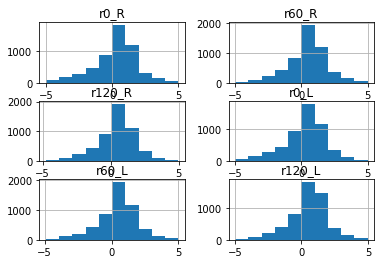

In [153]:
df.hist()

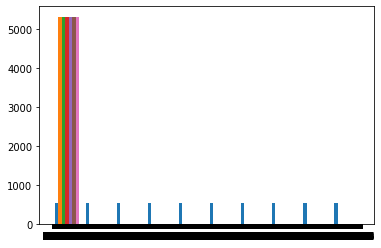

In [154]:
import matplotlib.pyplot as plt

plt.hist(df, bins = 10)
plt.show()

In [155]:
count=0
for i in (df['id']):
    if 'N' in i:
        count=count+1
print(count)

2329


In [156]:
id_list=list(df['id'])

In [157]:
id_list

['N3',
 'N5',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'N11',
 'N12',
 'N13',
 'N15',
 'N17',
 'N18',
 'N19',
 'N20',
 'N21',
 'N24',
 'N26',
 'N27',
 'N29',
 'N31',
 'N32',
 'N33',
 'N34',
 'N35',
 'N38',
 'N39',
 'N40',
 'N41',
 'N43',
 'N44',
 'N45',
 'N46',
 'N47',
 'N48',
 'N49',
 'N50',
 'N51',
 'N52',
 'N53',
 'N54',
 'N55',
 'N56',
 'N57',
 'N58',
 'N59',
 'N60',
 'N61',
 'N62',
 'N63',
 'N64',
 'N65',
 'N66',
 'N68',
 'N69',
 'N70',
 'N72',
 'N73',
 'N74',
 'N75',
 'N76',
 'N77',
 'N78',
 'N79',
 'N80',
 'N82',
 'N83',
 'N84',
 'N85',
 'N86',
 'N87',
 'N88',
 'N89',
 'N90',
 'N91',
 'N92',
 'N93',
 'N94',
 'N95',
 'N96',
 'N97',
 'N98',
 'N99',
 'N101',
 'N102',
 'N103',
 'N104',
 'N105',
 'N106',
 'N107',
 'N108',
 'N109',
 'N110',
 'N111',
 'N112',
 'N113',
 'N114',
 'N115',
 'N116',
 'N117',
 'N118',
 'N119',
 'N120',
 'N121',
 'N122',
 'N123',
 'N124',
 'N125',
 'N126',
 'N127',
 'N128',
 'N129',
 'N130',
 'N132',
 'N133',
 'N134',
 'N135',
 'N136',
 'N137',
 'N138',
 'N139',


In [158]:
sub= 'N'
for item in id_list:
    if sub in item:
        print(item)

N3
N5
N6
N7
N8
N9
N10
N11
N12
N13
N15
N17
N18
N19
N20
N21
N24
N26
N27
N29
N31
N32
N33
N34
N35
N38
N39
N40
N41
N43
N44
N45
N46
N47
N48
N49
N50
N51
N52
N53
N54
N55
N56
N57
N58
N59
N60
N61
N62
N63
N64
N65
N66
N68
N69
N70
N72
N73
N74
N75
N76
N77
N78
N79
N80
N82
N83
N84
N85
N86
N87
N88
N89
N90
N91
N92
N93
N94
N95
N96
N97
N98
N99
N101
N102
N103
N104
N105
N106
N107
N108
N109
N110
N111
N112
N113
N114
N115
N116
N117
N118
N119
N120
N121
N122
N123
N124
N125
N126
N127
N128
N129
N130
N132
N133
N134
N135
N136
N137
N138
N139
N140
N141
N142
N143
N144
N145
N146
N147
N148
N149
N150
N151
N152
N153
N154
N155
N156
N157
N159
N160
N161
N162
N163
N164
N165
N166
N167
N168
N169
N170
N171
N172
N173
N174
N175
N176
N178
N179
N180
N181
N182
N184
N185
N187
N188
N189
N190
N191
N192
N193
N195
N196
N197
N198
N199
N200
N202
N203
N204
N205
N206
N208
N209
N210
N211
N212
N213
N214
N215
N216
N219
N220
N221
N222
N223
N224
N225
N227
N228
N229
N230
N231
N233
N234
N235
N236
N237
N238
N239
N240
N241
N243
N244
N245
N246
N247
N248

N2330
N2331
N2332
N2333
N2334
N2335
N2336
N2337
N2338
N2339
N2340
N2341
N2342
N2343
N2344
N2345
N2346
N2347
N2348
N2349
N2350
N2351
N2352
N2353
N2354
N2355
N2356
N2357
N2358
N2359
N2360
N2361
N2362
N2363
N2364
N2365
N2366
N2367
N2368
N2369
N2370
N2371
N2372
N2373
N2374
N2375
N2376
N2377
N2378
N2379
N2380
N2381
N2382
N2383
N2384
N2385
N2386
N2388
N2389
N2390
N2391
N2392
N2393
N2394
N2395
N2396
N2397
N2398
N2399
N2400
N2401
N2402
N2403
N2404
N2406
N2407
N2408
N2409
N2410
N2411
N2412
N2413
N2414
N2415
N2416
N2417
N2418
N2419
N2420
N2421
N2422
N2423
N2424
N2425
N2426
N2427
N2428
N2429
N2430
N2431
N2432
N2434
N2435
N2436
N2437
N2438
N2439
N2440
N2441
N2442
N2443
N2444
N2445
N2446
N2447
N2448
N2449
N2450
N2451
N2452
N2453
N2454
N2455
N2456
N2458
N2459
N2460
N2461
N2462
N2463
N2464
N2465
N2467
N2468
N2469
N2470
N2471
N2472
N2473
N2474
N2475
N2477
N2478
N2479
N2480
N2481
N2482
N2483
N2484
N2485
N2486
N2487
N2488
N2489
N2490
N2491
N2492
N2493
N2494
N2495


In [159]:
del df['id']

In [160]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)


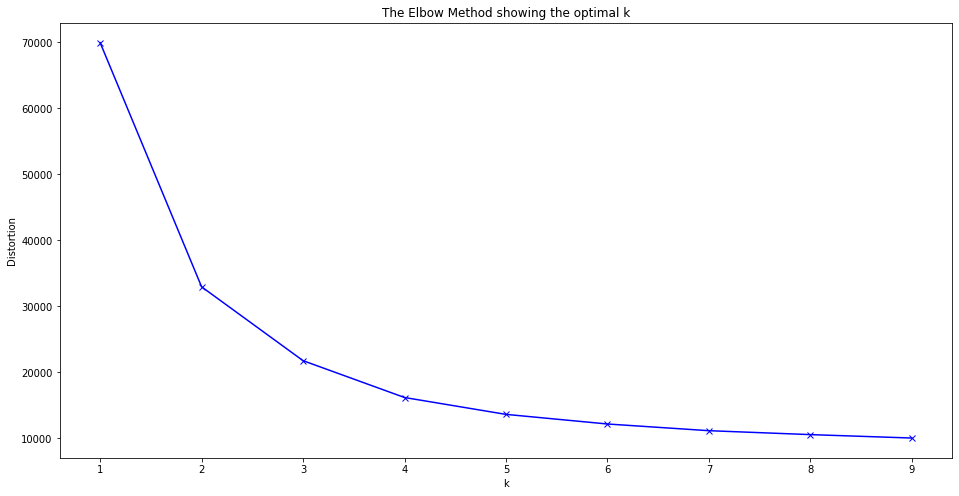

In [161]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [162]:
km = KMeans(n_clusters=250).fit(df)

In [163]:
km.cluster_centers_

array([[ 0.92397708,  1.08849072,  1.06582891,  1.14338225,  1.27217289,
         1.30971958],
       [-2.19056062, -1.30319789, -1.68927721, -2.15280693, -1.47688989,
        -1.2051246 ],
       [-0.35301815, -0.37075672, -0.52150815, -0.0747266 , -0.25029084,
        -0.08535992],
       ...,
       [ 0.45954768,  0.51095538,  0.54824693,  0.09391668,  0.23072371,
         0.26285961],
       [ 0.15636668,  0.92738706,  0.82249626, -1.39916654, -0.25459122,
        -0.59624224],
       [ 1.61287628,  0.51551795,  0.38631165,  1.73890965,  0.75888307,
         1.00956022]])

In [164]:
list_a=[]
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
print(closest)
closest.sort()
for i in range(len(closest)):
    if closest[i]<= 2329:
        k='N' + str(closest[i])
        list_a.append(k)
    if closest[i]> 2329:
        list_a.append(closest[i])

[ 533 3193 1539 3755 5066 4957 2376 3492 1097  355  464 1974 3070 1774
 4167 4285 5199  861 1813 2005 4253 3429 4325 4228 1967 1975  810 4200
  723 3098  253  867 2803 5113  956  135 4819 1033 2460 4353   44  513
  601 2711 2890 2255 2747  217 4333 4929 1526 3443  802 1382  379 3186
   46 3966 1678 2396 2364 5134 4587 2046 2824 4851 2690 1197 1570 3886
  299 4616 2093 1020 2857 1471  489 2452 4609  222    1 1192 1436 3943
 5173 1006 3038 4633 4713 2598 1951 1098  470 5280  136 2778 3390 1484
 1061 5212 4548 4826  348 3150 1779  517 4258 2794 4021  865  342 1116
 4902 2132 1220 2754 3139 4303  638 2813 1354 2375 1056 3201 2753 2606
  119 1781 5084  172 1186  614 2356  783 4970 3240 3735 1081 4622 3048
 4788 4671  398  234 1604 4369  887  484 5085 1182 3191 4934 4396 1469
 1909 2253 5010 2185 4213 4632 2197 1872 2543 1778  487 3012 5221 5064
 5182 1635  122  622 4124 3528  178 1244  462 5093 2730 3915 2017 3137
 5192 4994 1673 1563 2914  632 2453 1775  929 4752  110 2266 1956 2872
 2596 

In [165]:
list_a

['N1',
 'N44',
 'N46',
 'N110',
 'N119',
 'N122',
 'N135',
 'N136',
 'N172',
 'N173',
 'N178',
 'N217',
 'N222',
 'N234',
 'N253',
 'N271',
 'N274',
 'N287',
 'N299',
 'N317',
 'N320',
 'N342',
 'N348',
 'N355',
 'N379',
 'N398',
 'N403',
 'N462',
 'N464',
 'N470',
 'N484',
 'N487',
 'N489',
 'N513',
 'N517',
 'N533',
 'N592',
 'N601',
 'N614',
 'N622',
 'N632',
 'N638',
 'N640',
 'N723',
 'N735',
 'N783',
 'N802',
 'N810',
 'N839',
 'N861',
 'N864',
 'N865',
 'N867',
 'N887',
 'N906',
 'N929',
 'N956',
 'N1000',
 'N1006',
 'N1020',
 'N1033',
 'N1056',
 'N1061',
 'N1081',
 'N1097',
 'N1098',
 'N1114',
 'N1116',
 'N1152',
 'N1182',
 'N1186',
 'N1192',
 'N1194',
 'N1197',
 'N1220',
 'N1222',
 'N1244',
 'N1272',
 'N1354',
 'N1382',
 'N1436',
 'N1469',
 'N1471',
 'N1484',
 'N1497',
 'N1526',
 'N1539',
 'N1563',
 'N1570',
 'N1604',
 'N1635',
 'N1673',
 'N1678',
 'N1684',
 'N1754',
 'N1774',
 'N1775',
 'N1778',
 'N1779',
 'N1781',
 'N1791',
 'N1813',
 'N1872',
 'N1909',
 'N1951',
 'N1956',
 

In [166]:
df = pd.DataFrame(list_a)
df.to_csv('/home/aynur/Documents/results.csv')